In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
import glob, os, re, zipfile
%matplotlib inline
pd.options.display.max_columns = 100

In [2]:
# Columns useful for training
cols_needed = ['id','name','blurb','main_category','category_name','category_slug','creator_id','creator_name',
               'country','converted_pledged_amount','goal','created_at','launched_at','deadline','state',
               'state_changed_at','spotlight','staff_pick','location_localized_name','location_state','location_type']


def clean_csv(filepath,csv_file):
    
    fpath = filepath + csv_file
    print('Start cleaning ' + csv_file + '.')  

    df = pd.read_csv(fpath)
    # df2 = pd.read_csv('/Users/shaoyinghuang/Downloads/Kickstarter_2018-01-12T10_20_09_196Z/Kickstarter001.csv')

    # Convert data to the right format
    df['created_at'] = df['created_at'].apply(lambda x:
                                              datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
    df['launched_at'] = df['launched_at'].apply(lambda x:
                                                datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
    df['deadline'] = df['deadline'].apply(lambda x:
                                          datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
    df['state_changed_at'] = df['state_changed_at'].apply(lambda x:
                                          datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

    df['category_slug'] = df['category'].apply(lambda x: json.loads(x)['slug'])
    df['category_name'] = df['category'].apply(lambda x: json.loads(x)['name'])
    df['main_category'] = df['category_slug'].apply(lambda x: x.split('/')[0] if '/' in x else x)
    df['creator_id'] = df['creator'].apply(lambda x: json.loads(x)['id'])
    df['creator_name'] = df['creator'].apply(lambda x: json.loads(x)['name'])

    df['location_localized_name'] = df['location'].apply(lambda x: json.loads(x)['localized_name'] 
                                                         if isinstance(x, str) else np.nan)
    df['location_state'] = df['location'].apply(lambda x: json.loads(x)['state']
                                                if isinstance(x, str) else np.nan)
    df['location_type'] = df['location'].apply(lambda x: json.loads(x)['type']
                                               if isinstance(x, str) else np.nan)
    # Convert True/False into 1/0
    df['spotlight'] = df['spotlight'].apply(lambda x: 1 if x else 0)
    df['staff_pick'] = df['staff_pick'].apply(lambda x: 1 if x else 0)
    
    csv_save = fpath.rstrip('.csv') + '_cleaned.csv'
    df[cols_needed].to_csv(csv_save)
    print('Finish outputing ' + csv_save + '.')
    

In [3]:
# Make a list of csv files to download
with open('kickstarter_url.txt', 'r') as f:    
    html_line = f.read().split('\n')

url_list = list()
scrap_date = list()
for line in html_line:
    xx = re.match(r"<li>(..........)\W(.*)\[<a href=\"(.*).zip\">CSV</a>\]</li>",line)
    try:
        #print(xx.group(1),xx.group(3))
        scrap_date.append(xx.group(1))
        url_list.append(xx.group(3)+'.zip')
    except:
        break


In [8]:
# Download and unzip the files

import urllib.request
for url, date_scrapped in zip(url_list[:5],scrap_date[:5]):
    urllib.request.urlretrieve(url, "Kickstarter_"+date_scrapped+".zip")
    zip_ref = zipfile.ZipFile("Kickstarter_"+date_scrapped+".zip", 'r')
    zip_ref.extractall("Kickstarter_"+date_scrapped)
    zip_ref.close()
    print('Completed downloading Kickstarter_'+date_scrapped+'.zip')

    file_path = "Kickstarter_"+date_scrapped+"/"
    csv_filelist = [file for file in glob.glob(file_path + "*.csv")]
    
    # apply the cleaning function
    for x in csv_filelist:
        clean_csv('',x)
    
    # get all cleaned files
    all_csvFiles = glob.glob(file_path + "*cleaned.csv")
    
    # concatenate cleaned files
    frame = pd.DataFrame()
    list_ = []
    for file_ in all_csvFiles:
        df = pd.read_csv(file_,index_col=None, header=0)
        list_.append(df)
    frame = pd.concat(list_)
    frame.to_csv(file_path + date_scrapped + "_all.csv")
    

Completed downloading Kickstarter_2018-01-12.zip
Start cleaning Kickstarter_2018-01-12/Kickstarter040.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter040_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter041.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter041_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter043.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter043_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter042.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter042_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter046.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter046_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter047.csv.
Finish outputing Kickstarter_2018-01-12/Kickstarter047_cleaned.csv.
Start cleaning Kickstarter_2018-01-12/Kickstarter045.csv.
Finish outputing 

Finish outputing Kickstarter_2017-12-15/Kickstarter020_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter021.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter021_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter035.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter035_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter009.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter009_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter031.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter031_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter025.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter025_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter019.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter019_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter018.csv.
Finish outputing Kickstarter_2017-12-15/Kickstarter018_cleaned.csv.
Start cleaning Kickstarter_2017-12-15/Kickstarter0

Finish outputing Kickstarter_2017-11-15/Kickstarter004_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter038.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter038_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter039.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter039_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter005.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter005_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter011.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter011_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter007.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter007_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter013.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter013_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter012.csv.
Finish outputing Kickstarter_2017-11-15/Kickstarter012_cleaned.csv.
Start cleaning Kickstarter_2017-11-15/Kickstarter0

KeyError: "['converted_pledged_amount'] not in index"

In [354]:
df = pd.read_csv('Kickstarter_2018-01-12/2018-01-12_all.csv',usecols=range(2,21))
# Specify date format of several columns
df.created_at = pd.to_datetime(df.created_at)
df.launched_at = pd.to_datetime(df.launched_at)
df.deadline = pd.to_datetime(df.deadline)
df.state_changed_at = pd.to_datetime(df.state_changed_at)

# only filter out successful/failed cases
df = df[df['state'].isin(['successful','failed'])]
df['state'] = df['state'].apply(lambda x: 1 if x=='successful' else 0)

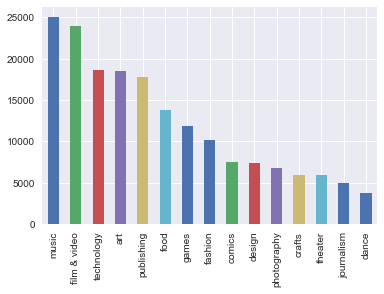

In [369]:
df['main_category'].value_counts().plot.bar();

/Users/shaoyinghuang/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


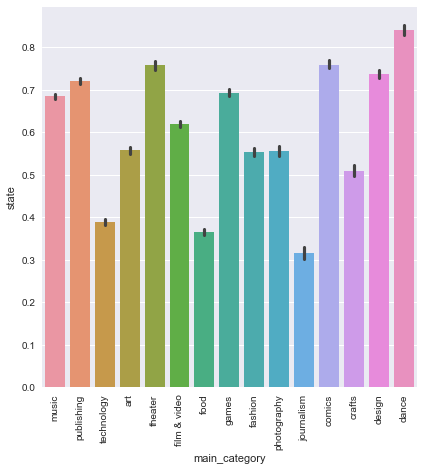

In [364]:
g = sns.factorplot(x="main_category", y="state", data=df, kind='bar', size=6)
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);

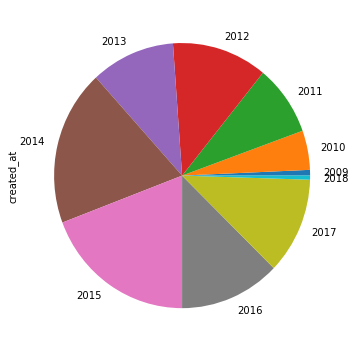

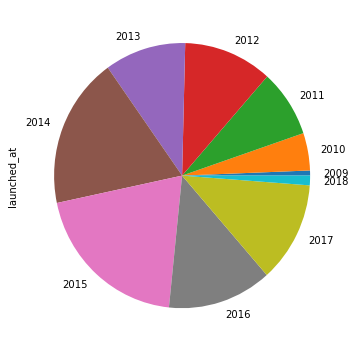

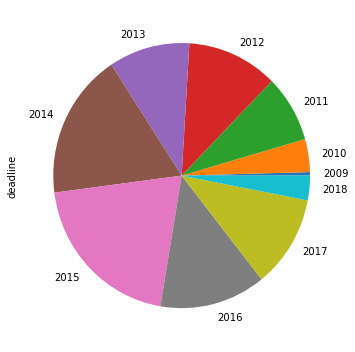

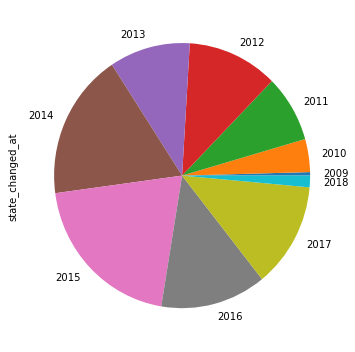

In [333]:
df.created_at.dt.year.value_counts().sort_index().plot.pie(figsize=(5,5))
plt.tight_layout()
plt.show()
df.launched_at.dt.year.value_counts().sort_index().plot.pie(figsize=(5,5))
plt.tight_layout()
plt.show()
df.deadline.dt.year.value_counts().sort_index().plot.pie(figsize=(5,5))
plt.tight_layout()
plt.show()
df.state_changed_at.dt.year.value_counts().sort_index().plot.pie(figsize=(5,5))
plt.tight_layout()
plt.show()